# РГР (ДЗ) по дисц. Интеллектуальные системы, пр. Убалехт И. П.
## Выполнил ст. гр. ИВТм-232, Бектимиров С. Р.

В scikit-learn есть кластеризация: https://scikit-learn.org/stable/auto_examples/index.html#clustering
тк при обучении на бакалавриате мы с парой одногруппников реализовывали метод к-средних для кластеризации набора точек (в рамках статьи), есть идея сравнить наш вариант с тем, что предлагает модуль k-means библиотеки scikit-learn

In [ ]:
#Исходная реализация.
#При запуске вводится 1. кол-во точек; 2.на сколько кластеров разибть
import matplotlib.pyplot as plt
import random as rn
from math import *

n=(int(input())+1)
K=int(input())

#Точки
points = []
for i in range(n-1):
    points.append([rn.randint(0,100), rn.randint(0,100)])
print('Точки: ', points)

#Центр кластера
points_to_centers=[]
OLD_points_to_centers=[]
k_centers = []
for i in range(K):
    k_centers.append([rn.randint(0,100), rn.randint(0,100)])
    points_to_centers.append([])
    OLD_points_to_centers.append([])
    print('Исходный центр',i,": ", k_centers[i])

#Cписок расстояний
rasstayaniya=[0]*K

while True:
    S = 0
    #Cоотносим точки с кластерами
    for i in range(n-1):
        MIN = 999
        for j in range(K):
            rasstayaniya[j] = sqrt((k_centers[j][0] - points[i][0]) ** 2 + (k_centers[j][1] - points[i][1]) ** 2)
            if rasstayaniya[j] < MIN:
                MIN = rasstayaniya[j]
                index = j
        points_to_centers[index].append(points[i])
        
    for i in range (K):
        print(i, 'кластер: ', points_to_centers[i])

    #Eсли кластеры не поменялись - выходим 
    for i in range (K):
        if (OLD_points_to_centers[i] == points_to_centers[i]):
            S += 1
    if S == K:
        break

    #Перенос центров
    for j in range(K):
        SUMM_x = 0
        SUMM_y = 0
        dlina = []
        for i in range(len(points_to_centers[j])):
            SUMM_x += points_to_centers[j][i][0]
            SUMM_y += points_to_centers[j][i][1]
        dlina = points_to_centers[j]
        k_centers[j][0] = (SUMM_x / (len(dlina)+1))
        k_centers[j][1] = (SUMM_y / (len(dlina)+1))
        print('Центр кластера',j,": ", k_centers[j])

    #Присваиваем старому кластеру точки
    for i in range(K):
        OLD_points_to_centers[i] = points_to_centers[i]
        points_to_centers[i] = []
#Цвета центров
for j in range(K):
    x = []
    y = []
    x.append(k_centers[j][0])
    y.append(k_centers[j][1])
    plt.plot(x,y,'o', markersize=10, c='y')
#Цвета точек
for j in range(K):
    x = []
    y = []
    for i in range(len(points_to_centers[j])):
        x.append(points_to_centers[j][i][0])
        y.append(points_to_centers[j][i][1])
    if j == 0:
        plt.plot(x,y,'o', c='r')
    elif j == 1:
        plt.plot(x,y,'o', c='b')
    elif j == 2:
        plt.plot(x,y,'o', c='g')
    else:
        plt.plot(x,y,'o', c='black')
plt.show()

Разобьём получение точек от кластеризации, чтобы использовать общий набор данных при сравнении 

In [56]:
import random as rn

n=(int(input())+1)
max_point = 100
n_after_dot = 1
max_point = max_point * pow(10, n_after_dot)
#Точки
points = []
for i in range(n-1):
    points.append([rn.randint(0,max_point)/(pow(10, n_after_dot)), rn.randint(0,max_point)/(pow(10, n_after_dot))])

def plot_points():
    x=[]
    y=[]
    for i in range(len(points)):
        x.append(points[i][0])
        y.append(points[i][1])
    plt.plot(x,y,'o', c='black')
    plt.show()

print('Список точек: ', points)
#plot_points()

 1000


Список точек:  [[76.8, 50.8], [17.0, 6.4], [30.3, 36.0], [62.5, 88.3], [72.7, 39.8], [62.3, 0.6], [7.7, 55.5], [57.6, 96.3], [28.8, 36.7], [21.7, 76.0], [21.6, 74.0], [84.5, 4.6], [39.7, 92.5], [96.8, 58.4], [48.5, 87.3], [91.3, 23.4], [57.8, 46.4], [88.1, 28.0], [67.4, 36.6], [44.1, 31.2], [9.3, 14.6], [54.7, 98.7], [49.6, 82.0], [37.3, 23.1], [37.6, 47.6], [10.4, 39.4], [31.7, 93.5], [7.4, 58.5], [43.7, 59.9], [68.4, 79.3], [6.9, 88.3], [8.2, 75.6], [56.6, 13.0], [63.0, 52.2], [21.1, 19.2], [97.1, 16.6], [72.9, 76.4], [88.9, 7.9], [77.4, 46.4], [93.9, 77.2], [28.0, 96.5], [73.6, 99.3], [26.1, 73.4], [17.5, 23.9], [46.8, 99.7], [92.4, 77.1], [94.6, 12.3], [56.9, 60.0], [37.6, 13.3], [51.6, 6.4], [90.1, 63.6], [7.4, 37.6], [15.5, 74.6], [17.6, 40.9], [86.9, 19.6], [43.4, 23.2], [63.1, 89.3], [66.2, 32.5], [87.7, 76.0], [43.0, 75.8], [76.8, 84.6], [57.6, 78.4], [91.2, 94.9], [90.2, 28.6], [56.5, 77.5], [68.0, 36.0], [55.4, 41.4], [39.0, 46.5], [60.3, 82.5], [48.6, 47.9], [18.2, 68.9], [

In [4]:
#Введём количество кластеров, на которые должны быть разделены точки:
K=int(input())

 2


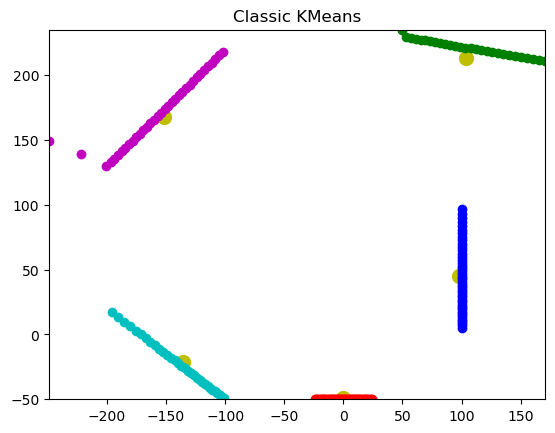

In [51]:
import matplotlib.pyplot as plt
import random as rn
from math import *

def classicKMeans(points, K):
    x = []
    y = []
    for i in range(len(points)):
        x.append(points[i][0])
        y.append(points[i][1])

    #Центр кластера
    points_to_centers=[]
    OLD_points_to_centers=[]
    k_centers = []
    for i in range(K):
        k_centers.append([rn.uniform(0.0,max(y)), rn.uniform(0.0,max(y))])
        points_to_centers.append([])
        OLD_points_to_centers.append([])
    #    print('Исходный центр',i,": ", k_centers[i])

    #Cписок расстояний
    rasstayaniya=[0]*K
    x = []
    y = []
    for i in range(len(points)):
        x.append(points[i][0])
        y.append(points[i][1])
    x_min, x_max = min(x), max(x)
    y_min, y_max = min(y), max(y)
    while True:
        S = 0
        #Cоотносим точки с кластерами
        for i in range(len(points)):
            MIN = inf
            for j in range(K):
                rasstayaniya[j] = sqrt((k_centers[j][0] - points[i][0]) ** 2 + (k_centers[j][1] - points[i][1]) ** 2)
                if rasstayaniya[j] < MIN:
                    MIN = rasstayaniya[j]
                    index = j
            points_to_centers[index].append(points[i])
            
    #    for i in range (K):
    #        print(i, 'кластер: ', points_to_centers[i])
    
        #Eсли кластеры не поменялись - выходим 
        for i in range (K):
            if (OLD_points_to_centers[i] == points_to_centers[i]):
                S += 1
        if S == K:
            break
    
        #Перенос центров
        for j in range(K):
            SUMM_x = 0
            SUMM_y = 0
            dlina = []
            for i in range(len(points_to_centers[j])):
                SUMM_x += points_to_centers[j][i][0]
                SUMM_y += points_to_centers[j][i][1]
            dlina = points_to_centers[j]
            k_centers[j][0] = (SUMM_x / (len(dlina)+1))
            k_centers[j][1] = (SUMM_y / (len(dlina)+1))
    #        print('Центр кластера',j,": ", k_centers[j])
    
        #Присваиваем старому кластеру точки
        for i in range(K):
            OLD_points_to_centers[i] = points_to_centers[i]
            points_to_centers[i] = []
    #Цвета центров
    for j in range(K):
        x = []
        y = []
        x.append(k_centers[j][0])
        y.append(k_centers[j][1])
        plt.plot(x,y,'o', markersize=10, c='y')
    #Цвета точек
    for j in range(K):
        x = []
        y = []
        for i in range(len(points_to_centers[j])):
            x.append(points_to_centers[j][i][0])
            y.append(points_to_centers[j][i][1])
        if j == 0:
            plt.plot(x,y,'o', c='r')
        elif j == 1:
            plt.plot(x,y,'o', c='g')
        elif j == 2:
            plt.plot(x,y,'o', c='b')
        elif j == 3:
            plt.plot(x,y,'o', c='c')
        elif j == 4:
            plt.plot(x,y,'o', c='m')
        else:
            plt.plot(x,y,'o', c='black')
    plt.title(
        "Classic KMeans"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

classicKMeans(points, K)

Попробуем теперь реализовать кластеризацию по примерам библиотеки scikit-learn

Пример для изучения:

In [18]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [19]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [20]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.224s	69545	0.598	0.645	0.621	0.469	0.617	0.163
random   	0.278s	69735	0.681	0.723	0.701	0.574	0.698	0.158
PCA-based	0.030s	72645	0.634	0.654	0.644	0.518	0.640	0.141
__________________________________________________________________________________


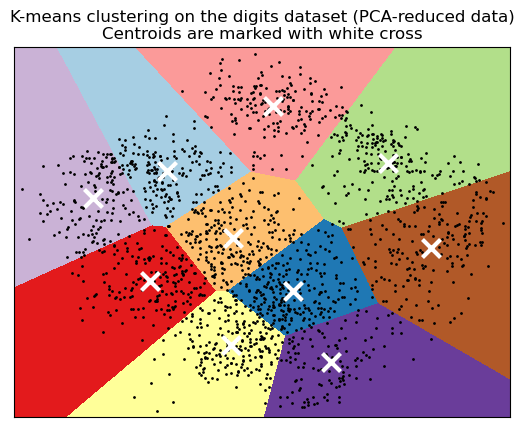

In [21]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Переделаем его

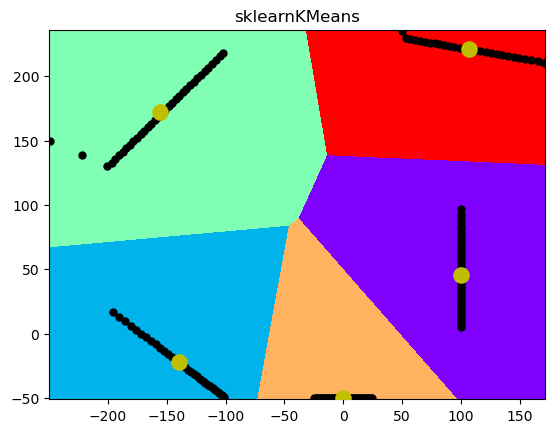

In [52]:
from sklearn.cluster import KMeans

def sklearnKMeans(points, K):
    kmeans = KMeans(init="k-means++", n_clusters=K, n_init=2)
    #init=[random/k-means++] - метод инициализации (выбор центров)
    #n_clusters - кол-во кластеров, на сколько разбить
    #n_init – сколько раз запускать расчёт с разными центрами, выбирается "лучший"

    kmeans.fit(points)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    x = []
    y = []
    for i in range(len(points)):
        x.append(points[i][0])
        y.append(points[i][1])

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = min(x) - 1, max(x) + 1
    y_min, y_max = min(y) - 1, max(y) + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.rainbow,
        aspect="auto",
        origin="lower",
    )

    plt.plot(x, y, "k.", markersize=10)
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="o",
        s=80,
        linewidths=3,
        color="y",
        zorder=10,
    )
    plt.title(
        "sklearnKMeans"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()

sklearnKMeans(points, K)

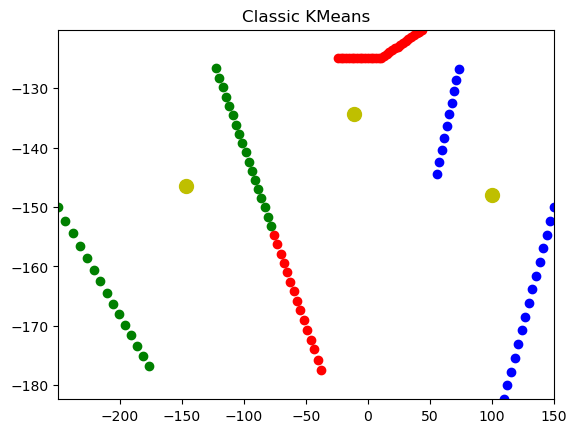

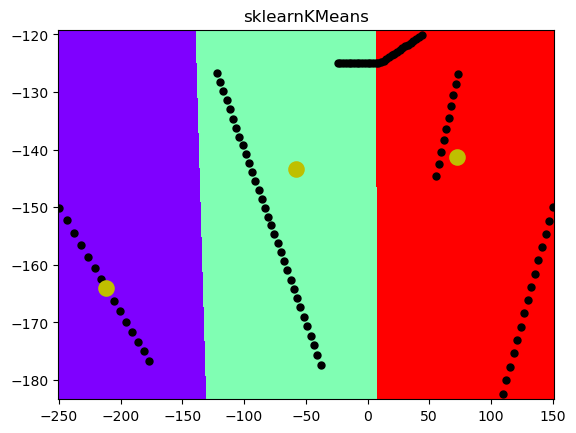

In [67]:
def getPoints(pathToData):
    pathToData = pathToData
    data_r = []
    points = []
    with open(pathToData, 'r') as f:
        stringi = f.read().splitlines()
    for i in range(len(stringi)):
        data_r.append(stringi[i].split(';'))
        points.append([float(data_r[i][0].replace(",", ".")), float(data_r[i][1].replace(",", "."))])
    return points

#data-tree
#.
#├── 1_Объект
#│   ├── ideal-1-obj_5.csv
#│   ├── ideal-1-obj_6.csv
#│   └── Исход.
#│       ├── 1-obj_5.csv
#│       └── 1-obj_6.csv
#├── 2-5_Объект(групп)
#│   ├── ideal-5-obj-g_5.csv
#│   ├── ideal-5-obj-g_6.csv
#│   └── Исход.
#│       ├── 5-obj-g_5.csv
#│       └── 5-obj-g_6.csv
#├── 2-5_Объект(групп-1)
#│   ├── ideal-5-obj-g1_5.csv
#│   ├── ideal-5-obj-g1_6.csv
#│   └── Исход.
#│       ├── 5-obj-g1_5.csv
#│       └── 5-obj-g1_6.csv
#├── 2-5_Объект(разряж)
#│   ├── ideal-5-obj-r_5.csv
#│   ├── ideal-5-obj-r_6.csv
#│   └── Исход.
#│       ├── 5-obj-r_5.csv
#│       └── 5-obj-r_6.csv
#├── 2_Объект(перекрыт)
#│   ├── ideal-2-obj-p_5.csv
#│   ├── ideal-2-obj-p_6.csv
#│   └── Исход.
#│       ├── 2-obj-p_5.csv
#│       └── 2-obj-p_6.csv
#├── 3_Объект(перекрыт)
#│   ├── ideal-3-obj-p_6.csv
#│   └── Исход.
#│       └── 3-obj-p_6.csv
#└── test.csv
# Использовать как ./data/*/Исход./*.csv

#points = getPoints("./data/test.csv")
points = getPoints("./data/3_Объект(перекрыт)/Исход./3-obj-p_6.csv")
#points = getPoints("./data/1_Объект/Исход./1-obj_5.csv")
#points = getPoints("./data/2-5_Объект(групп-1)/Исход./5-obj-g1_6.csv")
#points = getPoints("./data/2-5_Объект(групп)/Исход./5-obj-g_6.csv")
#points = getPoints("./data/2-5_Объект(разряж)/Исход./5-obj-r_5.csv")
K = 3 # K - кол-во кластеров указывать в соответствии с тем, сколько объектов

# Понижение порядка входных данных тк при вызове функции sklearnKMeans,
# В ней что-то приводит к утечке памяти (ОЗУ уходит в аут, больше 70Gb выделить не могу)
points_r=[]
for i in range(len(points)):
    points_r.append([round(v/10,15) for v in points[i]]) #Здесь можно поиграться с разрешением, меняя функцию round
points=points_r

# Вызов моей функции и вызов функции, написанной с использованием модуля KMeans библиотеки sklearn
classicKMeans(points, K)
sklearnKMeans(points, K)